## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE\ 519\ fall\ 2021/HW3

[Errno 2] No such file or directory: 'drive/MyDrive/CSE 519 fall 2021/HW3'
/content/drive/MyDrive/CSE 519 fall 2021/HW3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

In [ ]:
%cp kaggle.json /root/.kaggle/

In [ ]:
!kaggle competitions download -c  rossmann-store-sales

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 12.6MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 19.6MB/s]
 45% 3.00M/6.71M [00:00<00:00, 28.9MB/s]
100% 6.71M/6.71M [00:00<00:00, 42.8MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 5.70MB/s]


In [ ]:
%ls

cse519_hw3_bond_james_123456789.ipynb  sample_submission.csv  test.csv.zip
kaggle.json                            store.csv              train.csv.zip


## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

from sklearn import datasets
from sklearn import model_selection   
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import permutation_test_score
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_log_error
from matplotlib import rcParams

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#train data types
use_cols_train = ["Store", 
            "Sales", "Customers", "Open", "StateHoliday", "SchoolHoliday", "DayOfWeek", "Date"]

dtypes_train = {
    'Store':                                 'category',
    'Sales':                                 'int32',
    'Customers':                             'int32',
    'Open':                                  'int8',
    'Promo':                                 'int8'
 
}
    


In [4]:
#Train data 
df_train = pd.read_csv('train.csv', usecols = use_cols_train)

#print("------------Train Head---------------")

df_train.head()


C:\Users\capob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Store  DayOfWeek        Date  Sales  Customers  Open StateHoliday  \
0      1          5  2015-07-31   5263        555     1            0   
1      2          5  2015-07-31   6064        625     1            0   
2      3          5  2015-07-31   8314        821     1            0   
3      4          5  2015-07-31  13995       1498     1            0   
4      5          5  2015-07-31   4822        559     1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
#store data types 
use_cols_store = ["Store", "StoreType", "Assortment", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
           

dtypes_store = {
    'Store':                                 'category',
    'CompetitionDistance':                   'int32', 
    'Promo2':                                'int8'
    
}


In [6]:
#store data
df_store = pd.read_csv("store.csv", usecols = use_cols_store)

df_store

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  
0                           9.0                    2008.0  
1                          11.0                    2007.0  
2                          12.0                    2006.0  
3                           9.0                    2009.0  
4                           4.0                    2015.0  
...                         ...                       ...  
1110                        6.0                    2014.0  
1111                        4.0                    2006.0  
1112                        NaN                       NaN  
1113                        NaN                       NaN  
1114                        NaN                       NaN  

[1115 rows x 6 columns]

In [7]:
# main dataframe
df_main = pd.merge(df_store, df_train, 'right', 'Store')

df_main

Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  DayOfWeek  \
0                              9.0                    2008.0          5   
1                              9.0                    2008.0          4   
2                              9.0                    2008.0          3   
3                              9.0                    2008.0          2   
4                              9.0                    2008.0          1   
...                            ...                       ...        ...   
1017204                        NaN                       NaN          6   
1017205                        NaN                       NaN          5   
1017206                        NaN                       NaN          4   
1017207                        NaN                       NaN          3   
1017208                        NaN                       NaN          2   

               Date  Sales  Customers  Open StateHoliday  SchoolHoliday  
0        2015-07-31   5263        555     1            0              1  
1        2015-07-30   5020        546     1            0              1  
2        2015-07-29   4782        523     1            0              1  
3        2015-07-28   5011        560     1            0              1  
4        2015-07-27   6102        612     1            0              1  
...             ...    ...        ...   ...          ...            ...  
1017204  2013-01-05   4771        339     1            0              1  
1017205  2013-01-04   4540        326     1            0              1  
1017206  2013-01-03   4297        300     1            0              1  
1017207  2013-01-02   3697        305     1            0              1  
1017208  2013-01-01      0          0     0            a              1  

[1017209 rows x 13 columns]

## **Section 2: Effect of Holidays (Q2)**


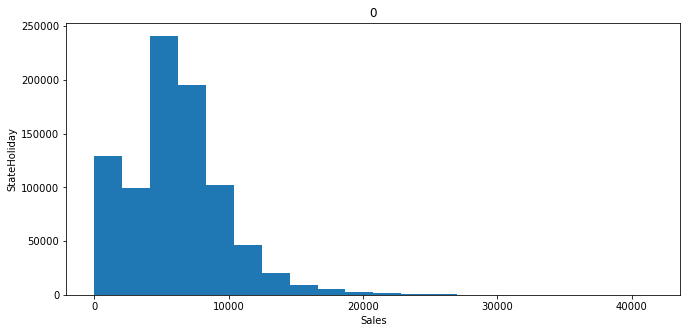

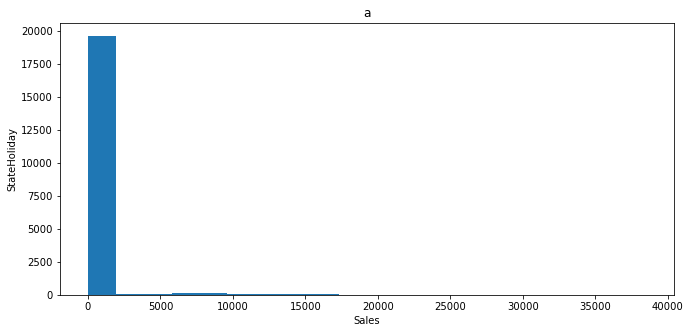

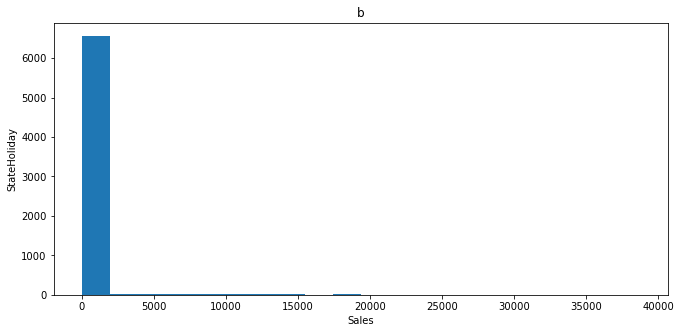

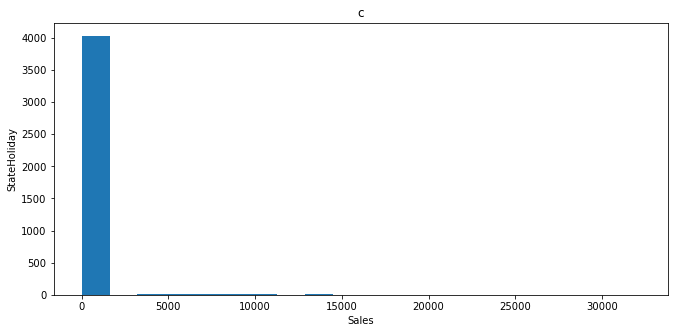

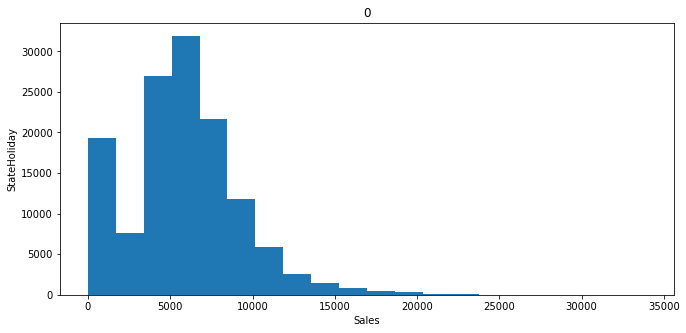

In [8]:
for i in df_main['StateHoliday'].unique():
    plt.figure(figsize=(11,5))
    plt.title(i)
    plt.hist(df_main[df_main.StateHoliday==i]['Sales'], bins=20)
    plt.ylabel("StateHoliday")
    plt.xlabel("Sales")
    plt.show()

In [ ]:
#

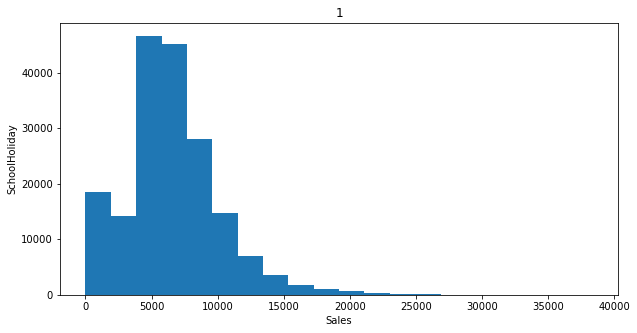

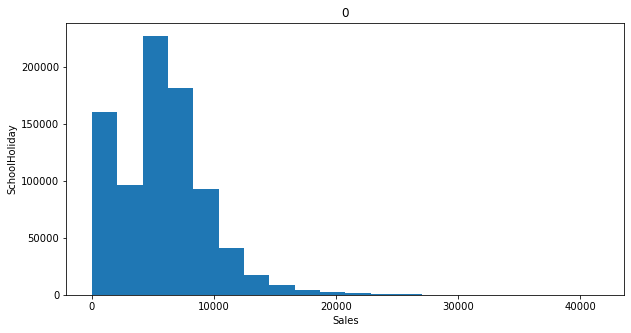

In [9]:
for i in df_main['SchoolHoliday'].unique():
    plt.figure(figsize=(10,5))
    plt.title(i)
    plt.hist(df_main[df_main.SchoolHoliday==i]['Sales'], bins=20)
    plt.ylabel("SchoolHoliday")
    plt.xlabel("Sales")
    plt.show()

People shop more before the holidays. This is accurate because most people would spent with family during holidays, therefore these plots depict the best representation of sales during holidays  

## **Section 3: Most and Least selling stores (Q3a & Q3b)**

In [10]:
df_main

Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  DayOfWeek  \
0                              9.0                    2008.0          5   
1                              9.0                    2008.0          4   
2                              9.0                    2008.0          3   
3                              9.0                    2008.0          2   
4                              9.0                    2008.0          1   
...                            ...                       ...        ...   
1017204                        NaN                       NaN          6   
1017205                        NaN                       NaN          5   
1017206                        NaN                       NaN          4   
1017207                        NaN                       NaN          3   
1017208                        NaN                       NaN          2   

               Date  Sales  Customers  Open StateHoliday  SchoolHoliday  
0        2015-07-31   5263        555     1            0              1  
1        2015-07-30   5020        546     1            0              1  
2        2015-07-29   4782        523     1            0              1  
3        2015-07-28   5011        560     1            0              1  
4        2015-07-27   6102        612     1            0              1  
...             ...    ...        ...   ...          ...            ...  
1017204  2013-01-05   4771        339     1            0              1  
1017205  2013-01-04   4540        326     1            0              1  
1017206  2013-01-03   4297        300     1            0              1  
1017207  2013-01-02   3697        305     1            0              1  
1017208  2013-01-01      0          0     0            a              1  

[1017209 rows x 13 columns]

In [36]:
#group2 = df_main.loc[:, ["Store", "Sales"]]

#gf2 = pd.DataFrame(group, columns= ["Store", "Sales"])

#cumul_result2 = gf2.groupby("Store").sum()
#group_new = cumul_result2.loc[:, "Sales"]
#print(group_new)
#print(cumul_result2)

#["Store", 
#            "Sales", "Customers", "Open", "StateHoliday", "SchoolHoliday", "DayOfWeek"]
#["Store", "StoreType", "Assortment", "CompetitionDistance", "CompetitionOpenSinceMonth"]


In [11]:
cumul_result = df_main.groupby("Store").sum()

gf_main = cumul_result[cumul_result.CompetitionOpenSinceMonth>=6]


In [12]:
#Stores with highest cumulative sales 
df_high = gf_main.nlargest(5,['Sales'])
df_high

CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                   
262              1111560.0                     4710.0   
817               131880.0                     2826.0   
513               376800.0                     7536.0   
788              1441260.0                     2826.0   
733               810120.0                     9420.0   

       CompetitionOpenSinceYear  DayOfWeek     Sales  Customers  Open  \
Store                                                                   
262                   1896246.0       3766  19516842    3204694   942   
817                   1889652.0       3766  17057867    2454370   784   
513                   1896246.0       3766  14252406    1643527   784   
788                   1896246.0       3766  14082141    1346835   784   
733                   1883058.0       3766  14067158    3206058   942   

       SchoolHoliday  
Store                 
262              169  
817              173  
513              173  
788              173  
733              170

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

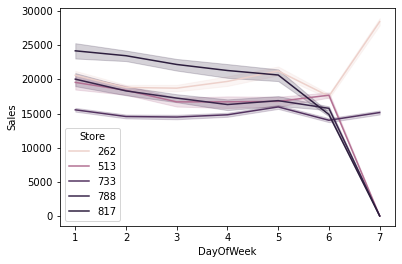

In [13]:
df_high_plot = df_main[df_main['Store'].isin([262, 817, 513, 788, 733])]
sns.lineplot(data=df_high_plot, hue='Store', x='DayOfWeek', y='Sales')

In [14]:
#Stores with least cumulative sales 
df_least = gf_main.nsmallest(5,['Sales'])
df_least

CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                   
307             17577720.0                     8478.0   
543              1017360.0                    11304.0   
198               273180.0                     8478.0   
208               282600.0                     3768.0   
263               864120.0                     3790.0   

       CompetitionOpenSinceYear  DayOfWeek    Sales  Customers  Open  \
Store                                                                  
307                   1885884.0       3766  2114322     240704   782   
543                   1895304.0       3766  2179287     187583   781   
198                   1885884.0       3766  2268273     264690   782   
208                   1889652.0       3766  2302052     324162   784   
263                   1525854.0       3033  2306075     221342   622   

       SchoolHoliday  
Store                 
307              167  
543              193  
198              167  
208              173  
263              124

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

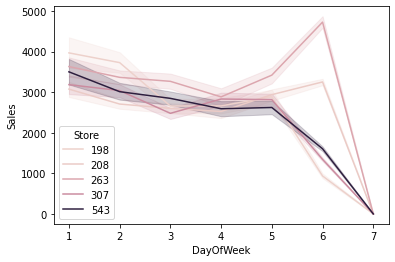

In [15]:
df_least_plot = df_main[df_main['Store'].isin([307, 543, 198, 208, 263])]
sns.lineplot(data = df_least_plot, hue = 'Store', x = 'DayOfWeek', y = 'Sales')

For both highest and least, it seem Sales drop significantly when reaching the end of the week. 

## **Section 4: Closest Competitor: Distance and Age (Q4a & Q4b)**

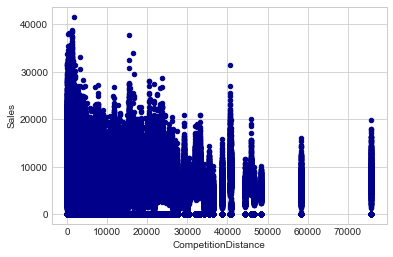

In [16]:
#4a
plt.style.use('seaborn-whitegrid')

#df_main.loc[:, ["Store", "Sales"]]
df = df_main.loc[:,['CompetitionDistance', 'Sales']]

df.dropna(how='any', inplace=True)
#df.plot()
df.plot.scatter(x='CompetitionDistance', y='Sales', c='DarkBlue')
plt.show()                    
                      

The stores farther from competitor have worse sales than ones close. 

## **Section 5: Pearson Correlation of Features (Q5)**

In [ ]:
df = pd.DataFrame({"A": A, "B": B})
sbn.jointplot(x="A", y="B", data=df, alpha=0.2)

<AxesSubplot:>

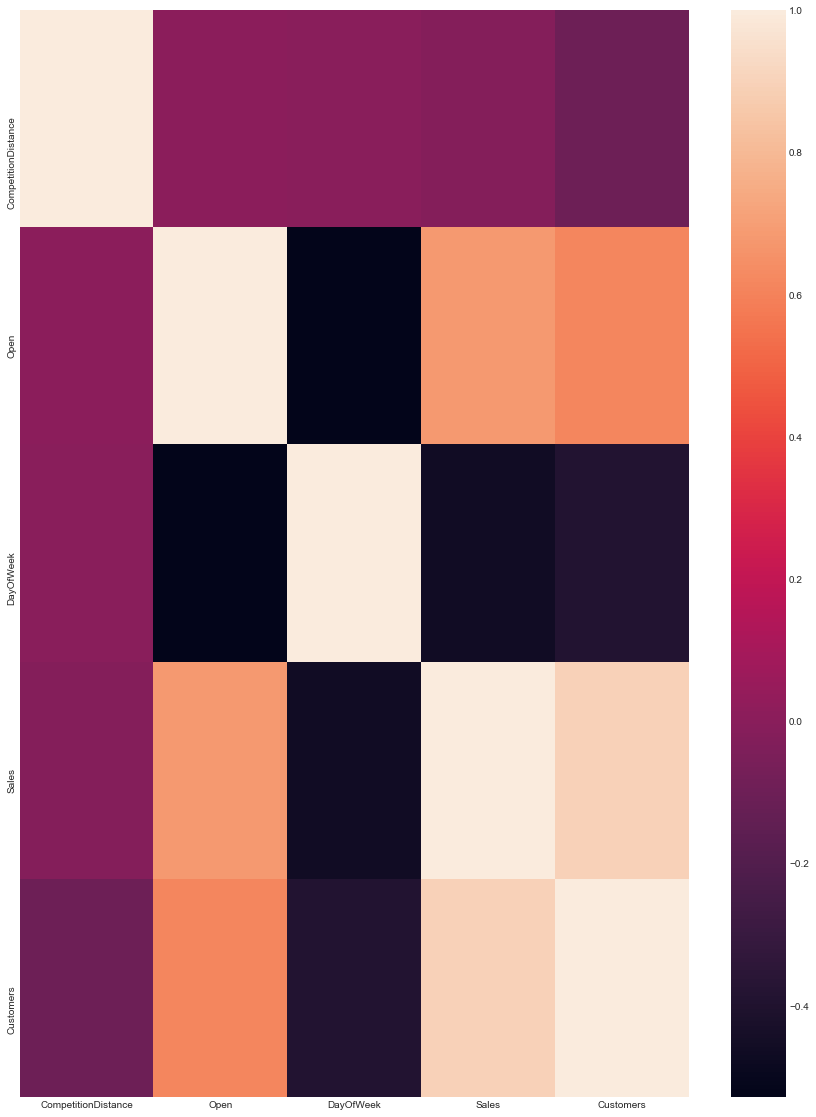

In [17]:
use_5_cols = [ "CompetitionDistance", "Open",  "DayOfWeek", "Sales", "Customers"]
           
#df_main = pd.merge(df_store, df_train, 'right', 'Store')
df_pear = df_main.loc[:,use_5_cols]
#df_pear.head(3)
dims =(15,20)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax, data=df_pear.corr())

In [19]:
corr_val = df_pear.corr()

corr_new = corr_val.unstack()
corr_new = corr_new.sort_values()

pd.set_option('display.max_rows', None)
print(corr_new[corr_new > 0])
print(corr_new[corr_new < 0])

Open                 CompetitionDistance    0.007992
CompetitionDistance  Open                   0.007992
Open                 Customers              0.616768
Customers            Open                   0.616768
Open                 Sales                  0.678472
Sales                Open                   0.678472
Customers            Sales                  0.894711
Sales                Customers              0.894711
CompetitionDistance  CompetitionDistance    1.000000
DayOfWeek            DayOfWeek              1.000000
Open                 Open                   1.000000
Sales                Sales                  1.000000
Customers            Customers              1.000000
dtype: float64
Open                 DayOfWeek             -0.528963
DayOfWeek            Open                  -0.528963
Sales                DayOfWeek             -0.462125
DayOfWeek            Sales                 -0.462125
                     Customers             -0.386445
Customers            DayOfWeek 

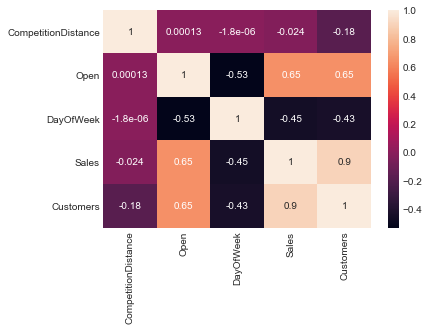

In [430]:
#Spearman

corr = df_pear.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

Customers corrlate best with Sales which makes sense. with Spearman correlation it's the same however, the heatmap has correlation values for all feature on the plot.  

## **Section 6: Permutation Testing (Q6)**

In [429]:
gf_try = df_main[df_main.Sales!=0]
#gf_try['Sales']
def root_mean_squared_error(Y_test ,Y_pred):
    return np.sqrt(np.mean((np.log(Y_test) - np.log(Y_pred))**2))

In [428]:
Permut_feat = ["Store", "DayOfWeek", "Customers"]
#new_main = df_main[Permut_feat].head(3)
X  = gf_try[Permut_feat]
Y = gf_try['Sales'] 

for i in Permut_feat:
    Score_metric = metrics.make_scorer(root_mean_squared_error, greater_is_better=False) 
    classifier = LinearRegression()
    score, permutation_scores, p_value = permutation_test_score(classifier, X, Y, n_permutations = 150, scoring = Score_metric, cv =5)
                                                             
    print (i, p_value)
 

Store 0.006622516556291391
DayOfWeek 0.006622516556291391
Customers 0.006622516556291391


## **Section 7: Interesting findings (Q7)**

<AxesSubplot:xlabel='CompetitionDistance'>

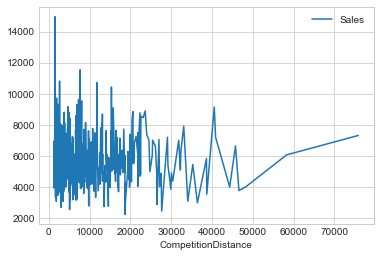

In [426]:
#Line plot 

df = df_main.loc[:,['CompetitionDistance', 'Sales']]

df.dropna(how='any', inplace=True)
df = df[df.CompetitionDistance>1270]
df = df.groupby('CompetitionDistance').mean()
df.plot()

The closest stores are to competition, the more sales there are. 

In [22]:
df_main.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
#Scatter plots

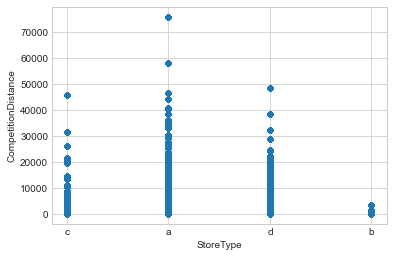

In [23]:
df = df_main.loc[:,['StoreType', 'CompetitionDistance']]
df.dropna(how='any', inplace=True)
df.plot(x='StoreType', y='CompetitionDistance', kind='scatter')
plt.show()

Store type 'b' are have the closest distance to competition compare to other with least competitions. while type 'a'  more farther from competition and with most competitions.  

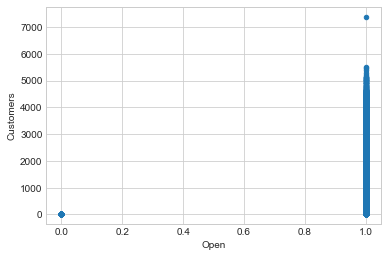

In [425]:

df = df_main.loc[:,['Open', 'Customers']]
df.dropna(how='any', inplace=True)
df.plot(x='Open', y='Customers', kind='scatter')

plt.show()

This is a correaltion between how many customers a store get given that they are open. 

In [97]:
df_main.head(500)

Store StoreType Assortment  CompetitionDistance  \
0        1         c          a               1270.0   
1        1         c          a               1270.0   
2        1         c          a               1270.0   
3        1         c          a               1270.0   
4        1         c          a               1270.0   
5        1         c          a               1270.0   
6        1         c          a               1270.0   
7        1         c          a               1270.0   
8        1         c          a               1270.0   
9        1         c          a               1270.0   
10       1         c          a               1270.0   
11       1         c          a               1270.0   
12       1         c          a               1270.0   
13       1         c          a               1270.0   
14       1         c          a               1270.0   
15       1         c          a               1270.0   
16       1         c          a               1270.0   
17       1         c          a               1270.0   
18       1         c          a               1270.0   
19       1         c          a               1270.0   
20       1         c          a               1270.0   
21       1         c          a               1270.0   
22       1         c          a               1270.0   
23       1         c          a               1270.0   
24       1         c          a               1270.0   
25       1         c          a               1270.0   
26       1         c          a               1270.0   
27       1         c          a               1270.0   
28       1         c          a               1270.0   
29       1         c          a               1270.0   
30       1         c          a               1270.0   
31       1         c          a               1270.0   
32       1         c          a               1270.0   
33       1         c          a               1270.0   
34       1         c          a               1270.0   
35       1         c          a               1270.0   
36       1         c          a               1270.0   
37       1         c          a               1270.0   
38       1         c          a               1270.0   
39       1         c          a               1270.0   
40       1         c          a               1270.0   
41       1         c          a               1270.0   
42       1         c          a               1270.0   
43       1         c          a               1270.0   
44       1         c          a               1270.0   
45       1         c          a               1270.0   
46       1         c          a               1270.0   
47       1         c          a               1270.0   
48       1         c          a               1270.0   
49       1         c          a               1270.0   
50       1         c          a               1270.0   
51       1         c          a               1270.0   
52       1         c          a               1270.0   
53       1         c          a               1270.0   
54       1         c          a               1270.0   
55       1         c          a               1270.0   
56       1         c          a               1270.0   
57       1         c          a               1270.0   
58       1         c          a               1270.0   
59       1         c          a               1270.0   
60       1         c          a               1270.0   
61       1         c          a               1270.0   
62       1         c          a               1270.0   
63       1         c          a               1270.0   
64       1         c          a               1270.0   
65       1         c          a               1270.0   
66       1         c          a               1270.0   
67       1         c          a               1270.0   
68       1         c          a               1270.0   
69       1         c          a               1270.0   
70       1         c         

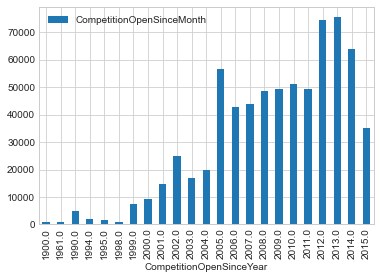

In [25]:
#bar
df = df_main.loc[:,['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']]
df.dropna(how='any', inplace=True)

df = df.groupby('CompetitionOpenSinceYear').count()
df.plot(kind='bar')


plt.show()


Competition among stores was prevalent until the start of the 21st century. As we can see at some point it drastically. Not sure what factors affected this decline.

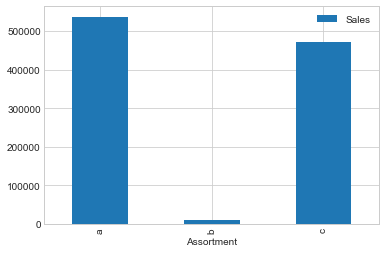

In [26]:

df = df_main.loc[:,['Assortment','Sales']]
df.dropna(how='any', inplace=True)

df = df.groupby('Assortment').count()
df.plot(kind='bar')



plt.show()


All stores Assorted by 'b' had little to no sales, whereas those of 'a' and 'b' had the most Sales among all store. 

## **Section 8: Train Test Split and Modelling (Q8)**

In [27]:
df_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [28]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [29]:
df_train.head(3)

Store  DayOfWeek        Date  Sales  Customers  Open StateHoliday  \
0      1          5  2015-07-31   5263        555     1            0   
1      2          5  2015-07-31   6064        625     1            0   
2      3          5  2015-07-31   8314        821     1            0   

   SchoolHoliday  
0              1  
1              1  
2              1

In [30]:
group = df_train.groupby("Date")
group.head(10)

Store  DayOfWeek        Date  Sales  Customers  Open StateHoliday  \
0            1          5  2015-07-31   5263        555     1            0   
1            2          5  2015-07-31   6064        625     1            0   
2            3          5  2015-07-31   8314        821     1            0   
3            4          5  2015-07-31  13995       1498     1            0   
4            5          5  2015-07-31   4822        559     1            0   
5            6          5  2015-07-31   5651        589     1            0   
6            7          5  2015-07-31  15344       1414     1            0   
7            8          5  2015-07-31   8492        833     1            0   
8            9          5  2015-07-31   8565        687     1            0   
9           10          5  2015-07-31   7185        681     1            0   
1115         1          4  2015-07-30   5020        546     1            0   
1116         2          4  2015-07-30   5567        601     1            0   
1117         3          4  2015-07-30   8977        823     1            0   
1118         4          4  2015-07-30  10387       1276     1            0   
1119         5          4  2015-07-30   4943        539     1            0   
1120         6          4  2015-07-30   4790        541     1            0   
1121         7          4  2015-07-30  11560       1116     1            0   
1122         8          4  2015-07-30   8420        882     1            0   
1123         9          4  2015-07-30   7539        651     1            0   
1124        10          4  2015-07-30   6186        556     1            0   
2230         1          3  2015-07-29   4782        523     1            0   
2231         2          3  2015-07-29   6402        727     1            0   
2232         3          3  2015-07-29   7610        716     1            0   
2233         4          3  2015-07-29  10514       1258     1            0   
2234         5          3  2015-07-29   5899        658     1            0   
2235         6          3  2015-07-29   5275        542     1            0   
2236         7          3  2015-07-29  12074       1166     1            0   
2237         8          3  2015-07-29   7029        698     1            0   
2238         9          3  2015-07-29   7776        625     1            0   
2239        10          3  2015-07-29   5524        518     1            0   
3345         1          2  2015-07-28   5011        560     1            0   
3346         2          2  2015-07-28   5671        646     1            0   
3347         3          2  2015-07-28   8864        818     1            0   
3348         4          2  2015-07-28  10275       1191     1            0   
3349         5          2  2015-07-28   6083        598     1            0   
3350         6          2  2015-07-28   4839        576     1            0   
3351         7          2  2015-07-28  12342       1158     1            0   
3352         8          2  2015-07-28   6717        695     1            0   
3353         9          2  2015-07-28   8751        678     1            0   
3354        10          2  2015-07-28   6140        593     1            0   
4460         1          1  2015-07-27   6102        612     1            0   
4461         2          1  2015-07-27   6627        638     1            0   
4462         3          1  2015-07-27   8107        768     1            0   
4463         4          1  2015-07-27  11812       1379     1            0   
4464         5          1  2015-07-27   7059        650     1            0   
4465         6          1  2015-07-27   5723        582     1            0   
4466         7          1  2015-07-27  14869       1340     1            0   
4467         8          1  2015-07-27   8739        841     1            0   
4468         9          1  2015-07-27  10649        777     1            0   
4469        10          1  2015-07-27   7212        662     1            0   
5575         1          7  2015

In [31]:
#May, June, and July of 2015
df_target = df_train[(df_train.Date>='2015-05-01') & (df_train.Date<='2015-07-31')]

validation_set = df_target["Store"]
#validation_set.head(400)
validation_set.shape

(102580,)

In [32]:
df_target.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [33]:
#df_data = df_train[(df_train.Date<'2015-05-01')]
#df_data.head(10)
df_target.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [34]:

train_data = ["SchoolHoliday", "DayOfWeek", "Customers", "Open", "Sales"]
data_train = df_target[train_data]

#data_train.head(5)
data_train.shape

(102580, 5)

Linear Regression 

In [149]:
X_train, X_test, y_train, y_test =  model_selection.train_test_split(data_train , validation_set, train_size= .8)

In [422]:
classifier = LinearRegression()
%timeit classifier.fit(X_train, y_train)

6.98 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


for different hyperparaters, the model took the same time to train. 

In [412]:
classifier.score(X_test, y_test)

0.001940764945996154

In [413]:
y_test_pred = classifier.predict(X_test)
y_test_pred

array([560.51838118, 560.17787045, 550.75063688, ..., 555.2418841 ,
       558.42781374, 562.86952135])

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
print('Coefficients: \n', classifier.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))


Coefficients: 
 [ 4.6533252  -0.75703231  0.06493818 -2.37368249 -0.00679004]
Mean squared error: 104381.40


In [420]:
#RMSPE
def root_meansquare_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_test, y_test_pred)

336.1197056612438

Ridge Regression

In [419]:

ridge_class = Ridge(alpha=10000)
%timeit ridge_class.fit(X_train, y_train)

5.57 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For different hyperparameters, the time it took to train did not change significantly. About the same to train my model regardless of parameters.

5.11 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 100 loops each): alpha = 100.

5.28 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 100 loops each): alpha = 1000.

5.57 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each): alpha = 10000.

In [133]:
ridge_class.score(X_test, y_test)

0.0026221198174538607

In [157]:
y_test_pred_ridge = ridge_class.predict(X_test)
y_test_pred_ridge

array([562.24573373, 557.16637358, 552.21544242, ..., 555.17161198,
       557.27290074, 559.97744435])

In [158]:
print('Coefficients: \n', ridge_class.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred_ridge))


Coefficients: 
 [ 6.73406474e+00  3.70662142e-02  6.18933753e-02 -2.70720168e+00
 -6.36133277e-03]
Mean squared error: 104371.93


In [421]:
root_meansquare_percentage_error(y_test, y_test_pred_ridge)

335.60436340512985

## **Section 9: t-test (Q9)**

In [146]:
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind
import time


In [162]:
#ridge
ttest = ttest_ind(y_test, y_test_pred_ridge)
ttest

(-1.0945956811876862, 0.2737002340908011, 41030.0)

In [156]:
#linear 
ttest = ttest_ind(y_test, y_test_pred)
ttest

(-1.4190986296869201, 0.15587785981838778, 41030.0)

In [164]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Submission

In [171]:
df = df_train.iloc[:,1:]
df.head(3)

DayOfWeek        Date  Sales  Customers  Open StateHoliday  SchoolHoliday
0          5  2015-07-31   5263        555     1            0              1
1          5  2015-07-31   6064        625     1            0              1
2          5  2015-07-31   8314        821     1            0              1

In [227]:
test_cols = [ "Store", "Customers",  "Sales"]
df_try = df_train[test_cols]
df_try.head(3)

Store  Customers  Sales
0      1        555   5263
1      2        625   6064
2      3        821   8314

In [242]:
df_test = pd.read_csv('test.csv', low_memory=False)

df_test.head(3)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0

In [234]:
df_test.isnull().sum()

Id               243978
Store                 0
DayOfWeek        243978
Date             243978
Open             254340
Promo            243978
StateHoliday     243978
SchoolHoliday    243978
Customers             0
Sales                 0
dtype: int64

In [236]:
df_test.Open = df_test.Open.fillna(0)
df_test.Id   = df_test.Id.fillna(0)
df_test.DayOfWeek = df_test.DayOfWeek.fillna(0)
df_test.Date  = df_test.Date .fillna(0)
df_test.Promo  = df_test.Promo .fillna(0)
df_test.StateHoliday = df_test.StateHoliday.fillna(0)
df_test.SchoolHoliday = df_test.SchoolHoliday.fillna(0)


In [238]:
df_test.isnull().sum()
df_test.dtypes

Id               float64
Store              int64
DayOfWeek        float64
Date              object
Open             float64
Promo            float64
StateHoliday      object
SchoolHoliday    float64
Customers          int64
Sales              int64
dtype: object

In [390]:

use_cols_test = ["Id"]

In [ ]:
df_test.columns
#df_train.columns

In [391]:
sample = pd.read_csv('test.csv', usecols = use_cols_test)
#sample.head(59)

In [354]:
#pandas.concat([df1,df2])
pd.options.display.float_format = '{:,.0f}'.format
samplePred = pd.concat([sample, df_train], axis=1)
samplePred.head(10)

Id  Store  DayOfWeek        Date  Sales  Customers  Open StateHoliday  \
0   1      1          5  2015-07-31   5263        555     1            0   
1   2      2          5  2015-07-31   6064        625     1            0   
2   3      3          5  2015-07-31   8314        821     1            0   
3   4      4          5  2015-07-31  13995       1498     1            0   
4   5      5          5  2015-07-31   4822        559     1            0   
5   6      6          5  2015-07-31   5651        589     1            0   
6   7      7          5  2015-07-31  15344       1414     1            0   
7   8      8          5  2015-07-31   8492        833     1            0   
8   9      9          5  2015-07-31   8565        687     1            0   
9  10     10          5  2015-07-31   7185        681     1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
6              1  
7              1  
8              1  
9              1

In [ ]:
#gf_main = cumul_result[cumul_result.CompetitionOpenSinceMonth>=6]

In [392]:
pd.options.display.float_format = '{:,.0f}'.format

df_test = pd.concat([sample, df_train], axis=1)

df_test.head(10)


Id  Store  DayOfWeek        Date  Sales  Customers  Open StateHoliday  \
0   1      1          5  2015-07-31   5263        555     1            0   
1   2      2          5  2015-07-31   6064        625     1            0   
2   3      3          5  2015-07-31   8314        821     1            0   
3   4      4          5  2015-07-31  13995       1498     1            0   
4   5      5          5  2015-07-31   4822        559     1            0   
5   6      6          5  2015-07-31   5651        589     1            0   
6   7      7          5  2015-07-31  15344       1414     1            0   
7   8      8          5  2015-07-31   8492        833     1            0   
8   9      9          5  2015-07-31   8565        687     1            0   
9  10     10          5  2015-07-31   7185        681     1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
6              1  
7              1  
8              1  
9              1

In [334]:
df_test.dtypes

Id               float64
Store              int64
DayOfWeek          int64
Date              object
Sales              int64
Customers          int64
Open               int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

Ridge Regression test Predict 

In [393]:
pred1 = ridge_class.predict(df_test[new_cols])
print(pred1)


[4476.97095097 4978.04552019 6381.32119075 ...  552.61350255  552.61350255
  552.61350255]


In [394]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'Sales': pred1})

my_submission.columns = ['Id', 'Sales']

In [432]:
#41088
my_submission = my_submission[my_submission.Id<=41088]


my_submission.Id = my_submission.Id.astype(int)
my_submission.Sales = my_submission.Sales.astype(int)
#my_submission.dtypes
my_submission.head(3)

Id  Sales
0   1   4476
1   2   4978
2   3   6381

In [402]:
my_submission.to_csv('submission5.csv', index=False)

Linear Regression for test predict 

In [415]:
pred_linear = classifier.predict(df_test[new_cols])
print(pred_linear)

[ -850.88082889 -1131.53094468 -1922.80190149 ...   557.91256689
   557.91256689   557.91256689]


In [405]:
submission_linear = pd.DataFrame({'Id': df_test.Id, 'Sales': pred1})

submission_linear.columns = ['Id', 'Sales']

In [431]:
#41088
submission_linear = submission_linear[submission_linear.Id<=41088]


submission_linear.Id = submission_linear.Id.astype(int)
submission_linear.Sales = submission_linear.Sales.astype(int)
#my_submission.dtypes
submission_linear.head(3)

Id  Sales
0   1   -850
1   2  -1131
2   3  -1922

In [410]:
submission_linear.to_csv('submission6.csv', index=False)

## **Section 10: Screenshots (Q10)** 

Public Score & Highest Rank: 

Private Score & Highest Rank:

Kaggle profile link:

Screenshot(s):

Ridge Regression

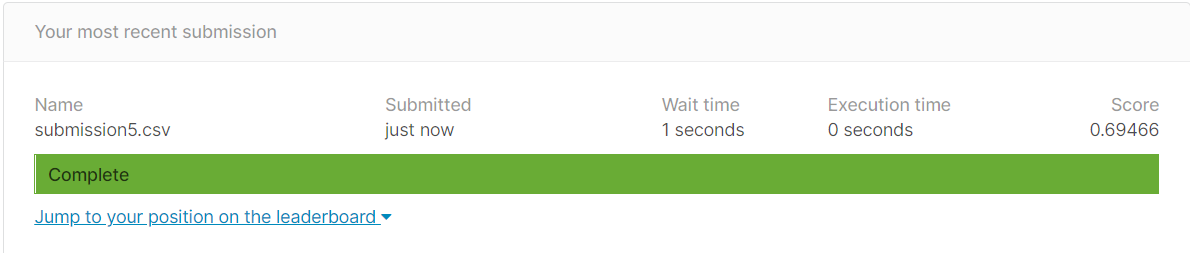

Linear Regression

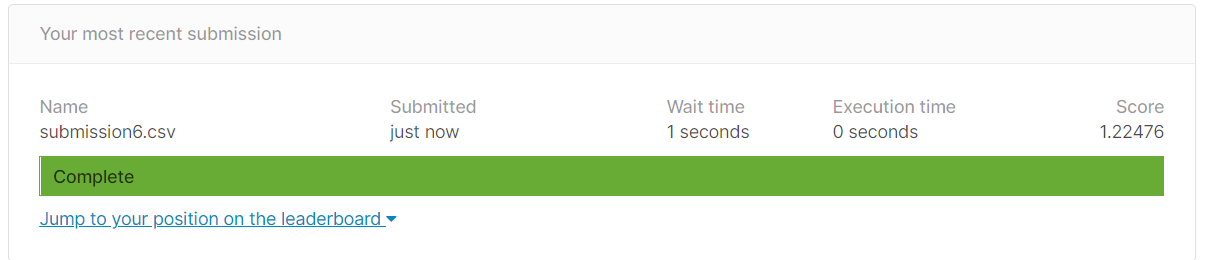

Kaggle profile link: https://www.kaggle.com/morphyyeboah